In [1]:
try:
    # if this notebook is being called by another one
    # used passed gene_name value
    gene_name
except:
    # otherwise, set value to amacGFP / avGFP / cgreGFP / ppluGFP,
    # for instance for debugging here
    gene_name="amacGFP" 

In [2]:
%run 00_functions.ipynb

Import modules
Define functions


In [3]:
print(f"Load {gene_name} data")

Load amacGFP data


In [4]:
wt_seqs={}

wt_seqs["avGFP"]   = 'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK*'
wt_seqs["amacGFP"] = 'MSKGEELFTGIVPVLIELDGDVHGHKFSVRGEGEGDADYGKLEIKFICTTGKLPVPWPTLVTTLSYGILCFARYPEHMKMNDFFKSAMPEGYIQERTIFFQDDGKYKTRGEVKFEGDTLVNRIELKGMDFKEDGNILGHKLEYNFNSHNVYIMPDKANNGLKVNFKIRHNIEGGGVQLADHYQTNVPLGDGPVLIPINHYLSCQTAISKDRNETRDHMVFLEFFSACGHTHGMDELYK*'
wt_seqs["cgreGFP"] = 'MTALTEGAKLFEKEIPYITELEGDVEGMKFIIKGEGTGDATTGTIKAKYICTTGDLPVPWATILSSLSYGVFCFAKYPRHIADFFKSTQPDGYSQDRIISFDNDGQYDVKAKVTYENGTLYNRVTVKGTGFKSNGNILGMRVLYHSPPHAVYILPDRKNGGMKIEYNKAFDVMGGGHQMARHAQFNKPLGAWEEDYPLYHHLTVWTSFGKDPDDDETDHLTIVEVIKAVDLETYR*'
wt_seqs["ppluGFP"] = 'MPAMKIECRITGTLNGVEFELVGGGEGTPEQGRMTNKMKSTKGALTFSPYLLSHVMGYGFYHFGTYPSGYENPFLHAINNGGYTNTRIEKYEDGGVLHVSFSYRYEAGRVIGDFKVVGTGFPEDSVIFTDKIIRSNATVEHLHPMGDNVLVGSFARTFSLRDGGYYSFVVDSHMHFKSAIHPSILQNGGPMFAFRRVEELHSNTELGIVEYQHAFKTPIAFA*'


In [5]:
wt_seqs_aligned={}

wt_seqs_aligned["avGFP"]    = 'MSK---GEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTLSYGVQCFSRYPDHMKQHDFFKSAM-PEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLP---DNHYLSTQSALSKDPNE-KRDHMVLLEFVTAAGITHGMDELYK*'
wt_seqs_aligned["amacGFP"]  = 'MSK---GEELFTGIVPVLIELDGDVHGHKFSVRGEGEGDADYGKLEIKFICTTGKLPVPWPTLVTTLSYGILCFARYPEHMKMNDFFKSAM-PEGYIQERTIFFQDDGKYKTRGEVKFEGDTLVNRIELKGMDFKEDGNILGHKLEYNFNSHNVYIMPDKANNGLKVNFKIRHNIEGGGVQLADHYQTNVPLGDGPVLIP---INHYLSCQTAISKDRNE-TRDHMVFLEFFSACGHTHGMDELYK*'
wt_seqs_aligned["cgreGFP"]  = 'MTALTEGAKLFEKEIPYITELEGDVEGMKFIIKGEGTGDATTGTIKAKYICTTGDLPVPWATILSSLSYGVFCFAKYPRHIA--DFFKSTQ-PDGYSQDRIISFDNDGQYDVKAKVTYENGTLYNRVTVKGTGFKSNGNILGMRVLYHSPPHAVYILPDRKNGGMKIEYNKAFDVMGGGHQMARHAQFNKPLGAWEEDYP---LYHHLTVWTSFGKDPDDDETDHLTIVEVIKAVDL--E---TYR*'
wt_seqs_aligned["ppluGFP"]  = 'MPA-----------MKIECRITGTLNGVEFELVGGGEGTPEQGRMTNKMKSTKGALTFSPYLLSHVMGYGFYHFGTYPSGYE--NPFLHAINNGGYTNTRIEKYEDGGVLHVSFSYRYEAGRVIGDFKVVGTGFPEDSVIFTDKII-RSNATVEHLHPM-GDNVLVGSFARTFSLRDGGYYSFVVDSHMHFKSAIHPSILQNGGPMFAFRRVEELH-----SNTELGIVEYQHAFKTPIAFA----*'


In [6]:
wt_seq=wt_seqs[gene_name]
print(gene_name, len(wt_seq), "aa")

amacGFP 239 aa


In [7]:
# if gene name is avGFP, compute pseudo-position genotypes
def get_pseudo_aa_positions(wt, aligned):
    d = {i:0 for i in range(len(wt))}
    pos_wt=0
    pos_al=0
    for i in range(len(aligned)):
        if aligned[i]!='-':
            d[pos_wt] = pos_al
            pos_al += 1
            pos_wt += 1
        else:
            pos_al += 1
            
    return d

In [8]:
native_to_pseudo_pos = get_pseudo_aa_positions(wt_seqs[gene_name],wt_seqs_aligned[gene_name] )

In [9]:
def native_mut_to_pseudo(mut):
    if mut=="wt":return(mut)
    else:return(f"{mut[0]}{native_to_pseudo_pos[int(mut[1:-1])]}{mut[-1]}")

def native_genotype_to_pseudo(genotype):
    if genotype=="wt":return("wt")
    else:return(":".join([native_mut_to_pseudo(mut) for mut in genotype.split(":")]))


In [10]:
pseudo_to_native_pos={v:k for k,v in native_to_pseudo_pos.items()}

In [ ]:
pseudo_to_native_pos

In [11]:
def pseudo_mut_to_native(mut):
    if mut=="wt":return(mut)
    else:return(f"{mut[0]}{pseudo_to_native_pos[int(mut[1:-1])]}{mut[-1]}")

def pseudo_genotype_to_native(genotype):
    if genotype=="wt":return("wt")
    else:return(":".join([pseudo_mut_to_native(mut) for mut in genotype.split(":")]))
    

In [12]:
if gene_name=="avGFP":
    datafile_path = rawDataPath+"amino_acid_genotypes_to_brightness.tsv"
    df = pd.read_csv(datafile_path, sep="\t")
    df = df.reset_index(drop=True)
    genotype_col = "aaMutations"
    brightness_col = "medianBrightness"
    df=df[[genotype_col,brightness_col]]
    df[genotype_col] = get_formatted_genotypes.fit_transform(df)
    df["aa_genotype_pseudo"] = df[genotype_col].apply(lambda x:native_genotype_to_pseudo(x))
    logged=False
else:
    datafile_path = rawDataPath+"amac_cgre_pplu_aa_genotype_indexed_clean_CDF_april2020.txt"
    df = pd.read_csv(datafile_path, sep="\t", index_col=0)
    df = df.loc[df["gene"] == gene_name]
    genotype_col = "aa_genotype_native"
    genotype_col_pseudo="aa_genotype_pseudo"
    brightness_col = "replicates_mean_brightness"
    df=df[[genotype_col,brightness_col,genotype_col_pseudo]]
    logged=True

wt_record = df.loc[df[genotype_col]=="wt"]
wt_index = wt_record.index

if logged:
    df[brightness_col] = np.log10(df[brightness_col])
    wt_record[brightness_col]=np.log10(wt_record[brightness_col])


df.head()

D:\AppData\Temp\ipykernel_34272\3746610603.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wt_record[brightness_col]=np.log10(wt_record[brightness_col])


,aa_genotype_native,replicates_mean_brightness,aa_genotype_pseudo
3,*238G,3.976523,*246G
6,*238L,3.949572,*246L
9,*238R,3.969685,*246R
11,*238W,3.989683,*246W
332,A156D,3.955111,A160D


In [13]:
# filter out genotypes with stop codons
df = df[~df[genotype_col].str.contains("\*")]
df.head()

,aa_genotype_native,replicates_mean_brightness,aa_genotype_pseudo
332,A156D,3.955111,A160D
333,A156D:F222L,3.935258,A160D:F230L
334,A156D:G172R,3.966105,A160D:G176R
335,A156D:H216N,3.953688,A160D:H224N
336,A156D:I196T:H228Y,4.002990,A160D:I203T:H236Y


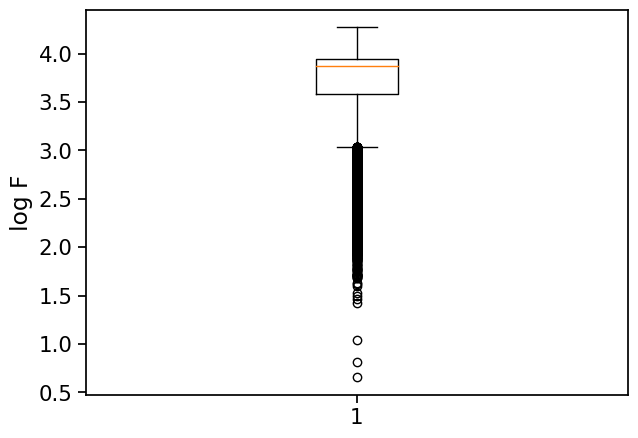

In [14]:
fig, ax = plt.subplots(figsize=(7, 5))
fig.patch.set_facecolor('w')
if logged:
    plt.boxplot(df[brightness_col])
    plt.ylabel("log F")
    
    df = df[df[brightness_col]>0]
else:
    plt.boxplot(np.log10(df[brightness_col]))
    df["logged"] = np.log10(df[brightness_col])
    df = df[df["logged"]>0]
    df = df.drop(["logged"],axis=1)

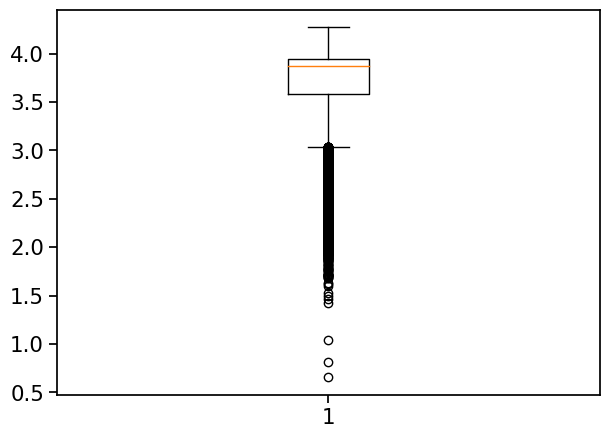

In [15]:
fig, ax = plt.subplots(figsize=(7, 5))
fig.patch.set_facecolor('w')

if logged:
    
    plt.boxplot(df[brightness_col])

else:
    plt.boxplot(np.log10(df[brightness_col]))


In [19]:
df

,aa_genotype_native,replicates_mean_brightness,aa_genotype_pseudo
332,A156D,3.955111,A160D
333,A156D:F222L,3.935258,A160D:F230L
334,A156D:G172R,3.966105,A160D:G176R
335,A156D:H216N,3.953688,A160D:H224N
336,A156D:I196T:H228Y,4.002990,A160D:I203T:H236Y
...,...,...,...
92366,Y91N:T107A,2.528028,Y95N:T111A
92371,Y91S,2.742189,Y95S
92377,Y91S:I196F,3.570923,Y95S:I203F
92378,Y91S:K125M:D132G:M152I:T204I,2.755337,Y95S:K129M:D136G:M156I:T211I


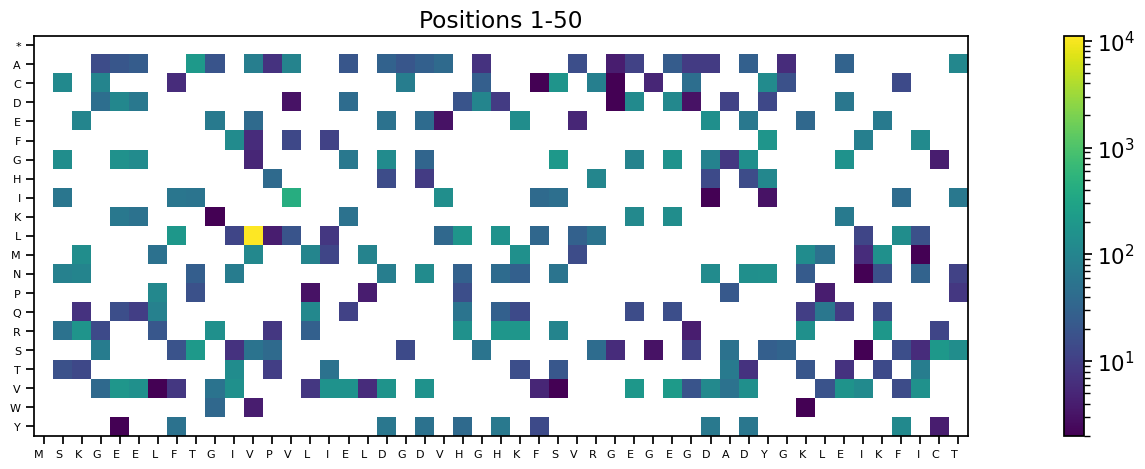

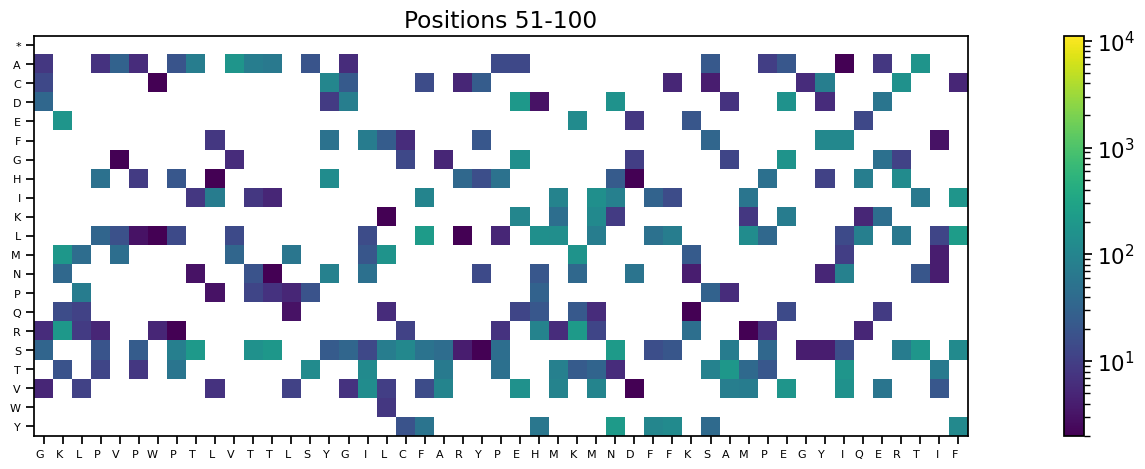

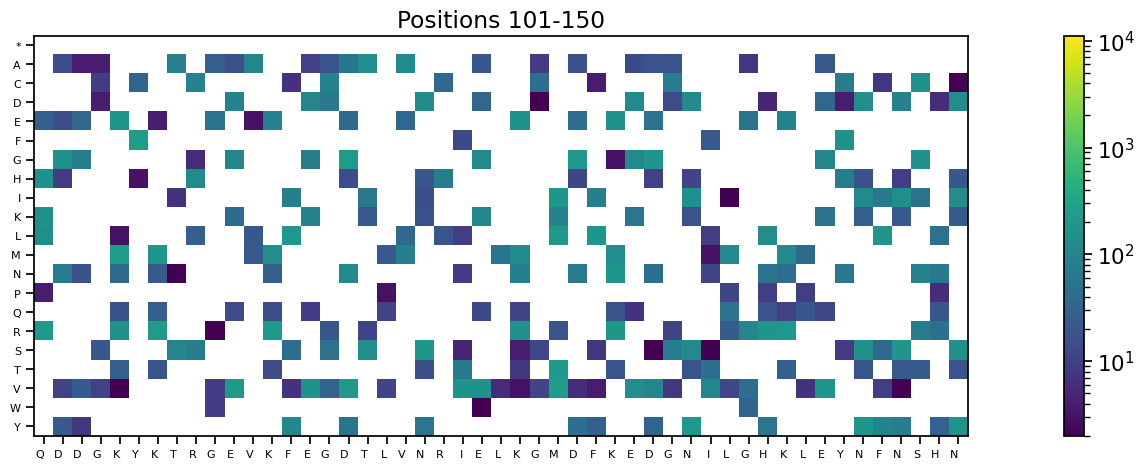

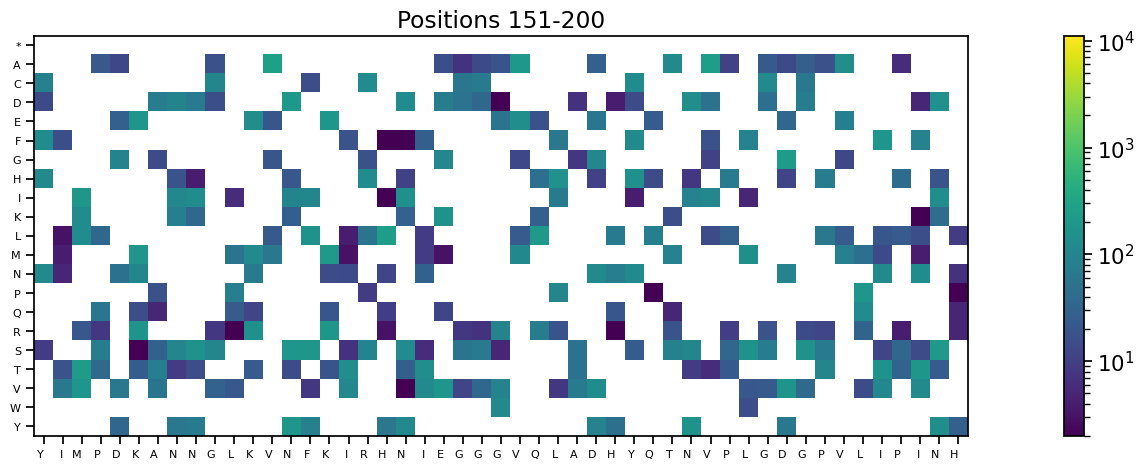

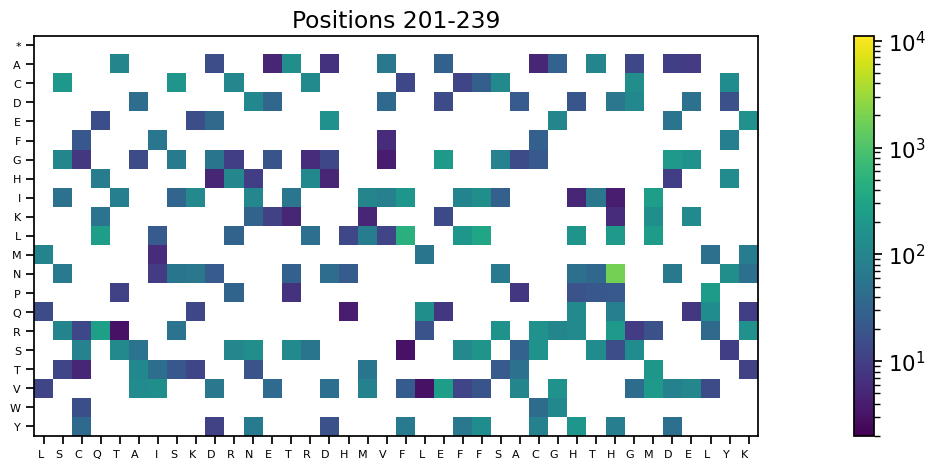

In [21]:

try:showmatrix
except: showmatrix=True

if showmatrix:
    # plot frequency of all mutations in the library

    # set the minimum number of occurences 
    # (mutations with less occurences than this threshold will not be represented)
    seen_at_least = 2

    codes = sorted(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
             'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', "*"])

    all_muts = sorted(list(flatten([ elt.split(":") for elt in df[genotype_col].values.flatten() if str(elt)!="wt"])))

    all_muts_as_dict={}
    for i in range(len(wt_seq)):
        c=wt_seq[i]
        all_muts_as_dict[i] = {k:0 for k in codes}

    for mut in all_muts:
        all_muts_as_dict[int(mut[1:-1])][mut[-1]]+=1 # fixed when introduced Louisa's numbering (M=0)


    all_muts_as_table = [[int(all_muts_as_dict[k][v2]) for v2 in sorted(all_muts_as_dict[k].keys())] for k in sorted(all_muts_as_dict.keys())]


    xs = [c for c in wt_seq]
    ys = codes

    mut_freq = pd.DataFrame(np.array(all_muts_as_table).transpose(),
                        index=ys,
                        columns=xs)

    def chunks(lst, n):
        """Yield successive n-sized chunks from lst."""
        for i in range(0, len(lst), n):
            yield lst[i:i + n]

    for cols in [elt for elt in chunks(range(len(mut_freq.columns)),50)]:

        data = mut_freq.iloc[:,cols[0]:cols[-1]]

        fig, ax = plt.subplots(figsize=(20, 5))
        fig.patch.set_facecolor('w')
        # We want to show all ticks...
        ax.set_xticks(range(len(data.columns)))
        ax.set_yticks(np.arange(len(codes)))
        # ... and label them with the respective list entries
        ax.set_xticklabels(data.columns,fontsize=8)
        ax.set_yticklabels(data.index,fontsize=8)

        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
                 rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        for i in range(len(ys)):
            for j in range(len(xs)):
                1#text = ax.text(j, i, data[i, j], ha="center", va="center", color="w",fontsize=8)

        ax.set_title("Positions "+str(cols[0]+1)+"-"+str(cols[-1]+1))
        fig.tight_layout()

        from matplotlib.colors import LogNorm

        my_cmap = plt.cm.viridis
        my_cmap.set_under("w")
        norm = LogNorm(vmin=seen_at_least, vmax=mut_freq.max().max())  # Specify vmin and vmax here
        im = ax.imshow(data,
               cmap=my_cmap,
               norm=norm)
        # im = ax.imshow(data,
        #                vmin=seen_at_least,
        #                vmax=mut_freq.max().max(),
        #                cmap=my_cmap,
        #                norm=LogNorm(vmin=2)) # vmax=1)

        fig.colorbar(im, ax=ax, 
                     orientation='vertical')   

        plt.show()
